In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


# DATA EXPLORATION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")

In [6]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [7]:
df.shape

(51717, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# DATA CLEANING

In [11]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(51717, 17)

cleaning 'approx_cost(for two people)' attribute

In [13]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(str)

In [14]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(lambda x: x.replace(",",""))
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(float)

In [15]:
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [16]:
# imputing 0 values of approx_cost(for two people) feature with mean on the attribute

mean_cost = df['approx_cost(for two people)'].mean()
df['approx_cost(for two people)'].fillna(mean_cost, inplace=True)

In [17]:
# dropping some unwanted features
df.drop(columns=["url","address","phone",'dish_liked', 'menu_item'],inplace=True)

Rate feature cleaning

In [18]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
df['rate'] = df['rate'].replace(['NAN','NEW'], '0')
df['rate'] = df['rate'].str.split('/').str[0].str.strip()
df['rate'] = df['rate'].str.split(' /').str[0].str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].astype(float)
df['rate'] = df['rate'].fillna(0)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [20]:
(~df.all(1)).sum()
df[df['rate'] == 0].shape[0]

10052

In [21]:
# removing the rate with value 0
df = df[df['rate'] != 0]

cleaning the name attribute

In [22]:
df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [23]:
df['name'] = df['name'].str.split(' - ').str[0].str.strip()
df['name'] = df['name'].str.lower()
df['name'].unique()

array(['jalsa', 'spice elephant', 'san churro cafe', ..., 'the nest',
       'nawabs empire', 'seeya restaurant'], dtype=object)

cleaning rest_type attribute

In [24]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [25]:
# imputing the null values of rest_type with mode (most frequent vale) of the attribute

most_freq = df['rest_type'].mode()[0]
df['rest_type'] = df['rest_type'].fillna(most_freq)

cleaning location and listed_in(city) features

In [26]:
# renaming the listed_in(city) attribute to rest_city

df = df.rename(columns = {'listed_in(city)' : 'rest_city'})

In [27]:
df['location'] = df['location'].str.split(',').str[0].str.strip() 

cleaning cuisine attribute

In [28]:
df['cuisines'] = df['cuisines'].fillna('Not Known')
df['cuisines'] = df['cuisines'].str.split(',').apply(lambda x: ', '.join(sorted(x[:3])) if len(x) >= 3 else ', '.join(sorted(x)))

In [29]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,41665.000000,41665.000000
mean,3.700449,351.653018,602.984462
std,0.440513,881.800960,462.964020
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,276.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [30]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'rest_city'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41665 non-null  object 
 1   online_order                 41665 non-null  object 
 2   book_table                   41665 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        41665 non-null  int64  
 5   location                     41665 non-null  object 
 6   rest_type                    41665 non-null  object 
 7   cuisines                     41665 non-null  object 
 8   approx_cost(for two people)  41665 non-null  float64
 9   reviews_list                 41665 non-null  object 
 10  listed_in(type)              41665 non-null  object 
 11  rest_city                    41665 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB


# DATA VISUALIZATION

In [32]:
import plotly.express as px
import plotly.graph_objects as go

### 1. Restaurants that have online order feature

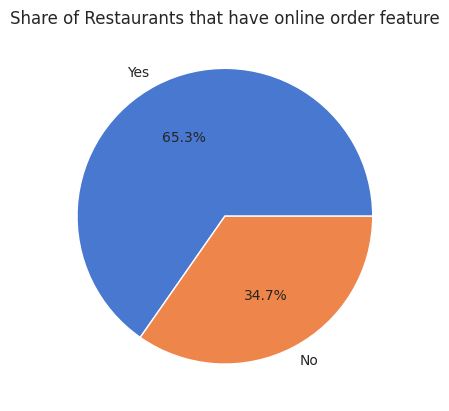

In [33]:
temp = df['online_order'].value_counts()
sns.set_style('dark')
colors = sns.color_palette("muted")
plt.pie(temp , labels=temp.index, autopct='%0.1f%%', colors=colors)
plt.title('Share of Restaurants that have online order feature')
plt.show()

### 2. Average Rates of restairants having Online Order feature (0 - No, 1 - Yes)

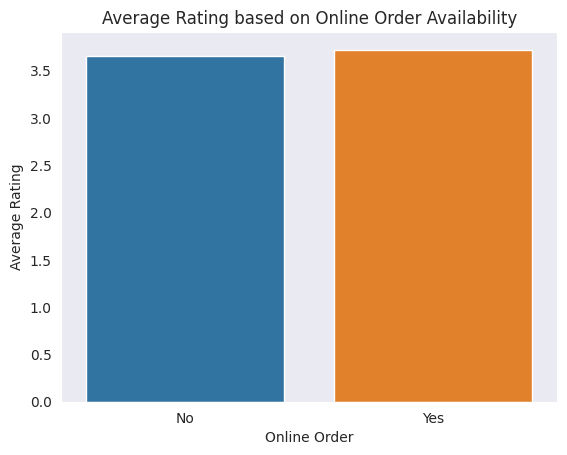

In [34]:
avg_ratings = df.groupby('online_order')['rate'].mean().reset_index()
sns.barplot(x='online_order', y='rate', data=avg_ratings)

plt.xlabel('Online Order')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Online Order Availability')
plt.show()

### 3. Restaurants that have Booking Table feature

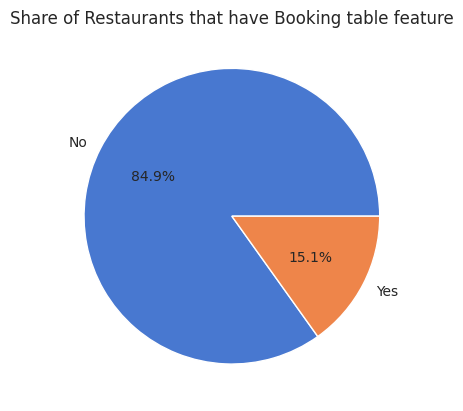

In [35]:
temp = df['book_table'].value_counts()
sns.set_style('dark')
colors = sns.color_palette("muted")
plt.pie(temp , labels=temp.index, autopct='%0.1f%%', colors=colors)
plt.title('Share of Restaurants that have Booking table feature')
plt.show()

### 4. Average Rates of restairants having booking table (0 - No, 1 - Yes)

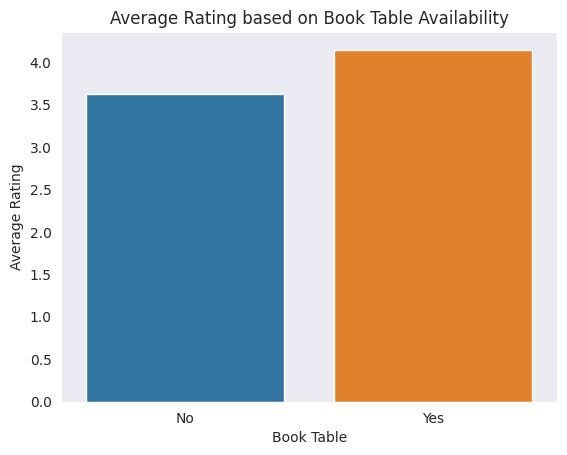

In [36]:
avg_ratings = df.groupby('book_table')['rate'].mean().reset_index()
sns.barplot(x='book_table', y='rate', data=avg_ratings)

plt.xlabel('Book Table')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Book Table Availability')
plt.show()

### 5. Top 10 Restaurant Rates

In [37]:
top_10_rest=df.sort_values('rate').drop_duplicates('rate',keep='last').tail(10).sort_values(by="rate",ascending=False)

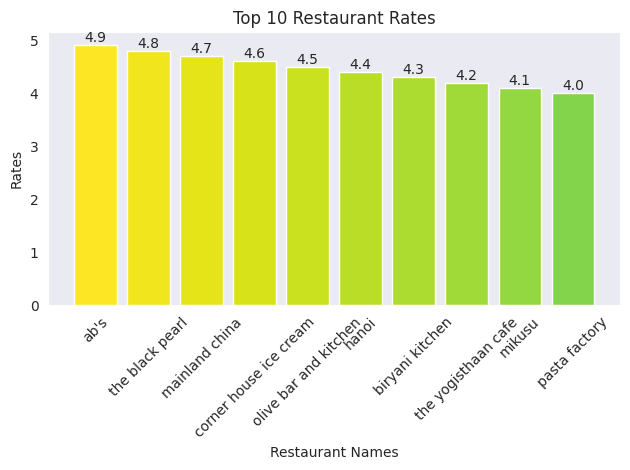

In [43]:
fig, ax = plt.subplots()
bars = ax.bar(top_10_rest["name"], top_10_rest["rate"], color=plt.cm.viridis(top_10_rest["rate"] / max(top_10_rest["rate"])))

# Add labels and title
ax.set_xlabel("Restaurant Names")
ax.set_ylabel("Rates")
ax.set_title("Top 10 Restaurant Rates")

# Add text labels above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Hide the legend if it exists
ax.legend().set_visible(False)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Top 5 Sales Points

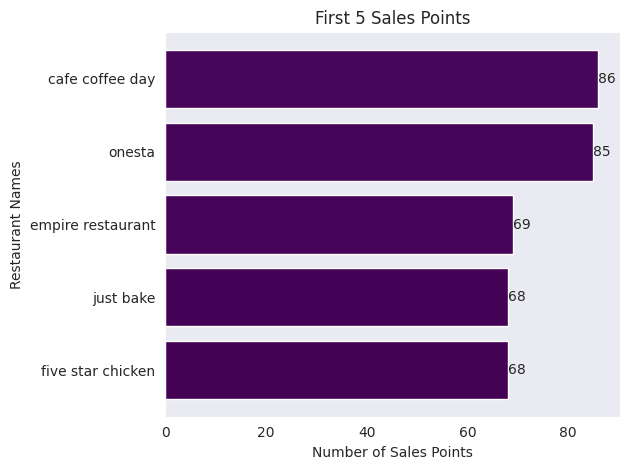

In [42]:
rests = df["name"].value_counts()[:5].sort_values()

# Generate a list of colors for each bar
colors = plt.cm.viridis(range(len(rests)))

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.barh(rests.index, rests.values, color=colors)

# Add labels and title
ax.set_xlabel("Number of Sales Points")
ax.set_ylabel("Restaurant Names")
ax.set_title("First 5 Sales Points")

# Add text labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, str(width), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

### 7. 5 Most Popular Restaurant Ratings

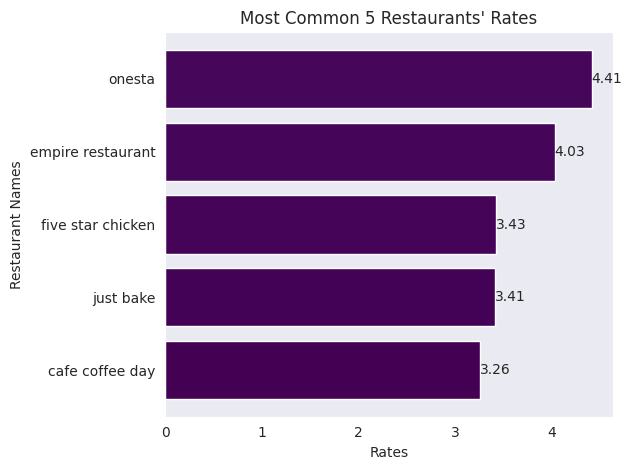

In [44]:
rests_list = df["name"].value_counts()[:5].index
rest_df = df[df["name"].isin(rests_list)]

# Calculate the mean rate for each of the top 5 restaurants
rest_df_groupped = rest_df.groupby("name")["rate"].mean().sort_values()

# Generate a list of colors for each bar
colors = plt.cm.viridis(range(len(rest_df_groupped)))

# Create a horizontal bar plot
fig, ax = plt.subplots()
bars = ax.barh(rest_df_groupped.index, rest_df_groupped.values, color=colors)

# Add labels and title
ax.set_xlabel("Rates")
ax.set_ylabel("Restaurant Names")
ax.set_title("Most Common 5 Restaurants' Rates")

# Add text labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

### 8. Top 10 Locations according to Average Rating

In [45]:
def create_bar_plots(df,col):
    x=df.groupby(col)["rate"].mean().nlargest(10).index
    y=df.groupby(col)["rate"].mean().nlargest(10).values
    fig = px.bar(x=x, y=y,text_auto='.2s',labels={'x': f'{col}', 'y':'Rate'})
    fig.update_layout(title=f"Top 10 {col} based on Mean Ratings ")
    fig.show()
create_bar_plots(df,"location")

### 9. Top 10 Restaurant Types according to Average Rating

In [46]:
create_bar_plots(df,"rest_type")

### 10. Location with the most number of Restaurants

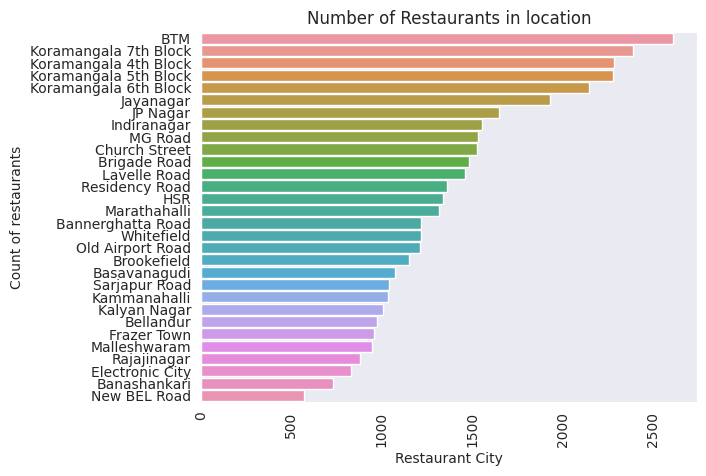

In [47]:
#Calculate count of restaurants in each city
city_counts = df['rest_city'].value_counts().reset_index()
city_counts.columns = ['rest_city', 'count']

#Create our bar plot
sns.barplot(y='rest_city', x='count', data=city_counts, width =0.9)

plt.xlabel('Restaurant City')
plt.ylabel('Count of restaurants')
plt.title('Number of Restaurants in location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

### 11.Top 10 Restaurant Types

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Quick Bites'),
  Text(1, 0, 'Casual Dining'),
  Text(2, 0, 'Cafe'),
  Text(3, 0, 'Dessert Parlor'),
  Text(4, 0, 'Delivery'),
  Text(5, 0, 'Takeaway, Delivery'),
  Text(6, 0, 'Casual Dining, Bar'),
  Text(7, 0, 'Bakery'),
  Text(8, 0, 'Bar'),
  Text(9, 0, 'Beverage Shop')])

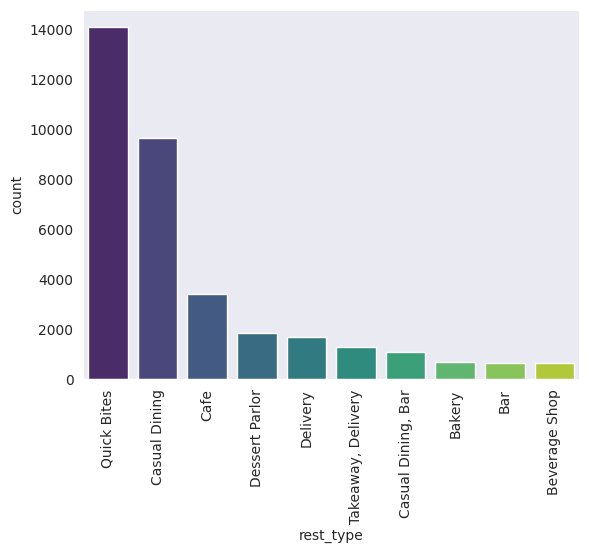

In [48]:
#get the top 10 restaurant types
top_rest_types = df['rest_type'].value_counts().head(10)

# Create our count plot to know which type is most common
sns.countplot(x='rest_type', data= df, order = top_rest_types.index , palette='viridis')
plt.xticks(rotation = 90)

### 12. Types of Services in Restaurants 

Text(0, 0.5, 'Percentage of total')

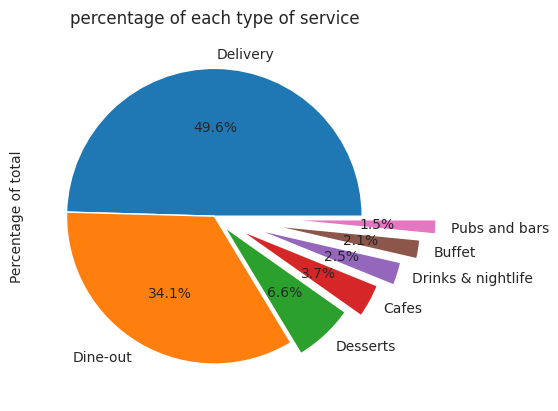

In [49]:
df['listed_in(type)'].value_counts().plot(kind ='pie', autopct = '%0.1F%%', explode =[0,0,0.1,0.2,0.3,0.4,0.5] )

plt.title('percentage of each type of service')
plt.ylabel('Percentage of total')

### 13. Top Cuisines offered by Restaurants

In [52]:
def foo(l):
    cuisine_count = {}
    l = l.split(',')
    for i in l:
        if i not in cuisine_count:
            cuisine_count[i] = 1
        else:
            cuisine_count[i] += 1
    return cuisine_count
            
            
temp = df['cuisines'].apply(lambda x: foo(x))
       
    

from collections import defaultdict

# Function to sum dictionaries in a Series
def sum_dicts(series):
    result = defaultdict(int)  # Initialize a defaultdict with int type
    for d in series:
        for key, value in d.items():
            result[key.strip()] += value  # Aggregate values for each key
    return dict(result)  # Convert back to a standard dictionary

# Summing dictionaries in the Series
summed_dict = sum_dicts(temp)

print(summed_dict) 

{'Chinese': 11719, 'Mughlai': 1300, 'North Indian': 16448, 'Thai': 819, 'Italian': 2675, 'Mexican': 409, 'Cafe': 4629, 'South Indian': 6024, 'Rajasthani': 137, 'Andhra': 1372, 'Pizza': 1493, 'Continental': 4713, 'Fast Food': 5833, 'American': 1196, 'French': 62, 'Bakery': 1956, 'Beverages': 2988, 'Desserts': 3921, 'Biryani': 4604, 'Momos': 854, 'Street Food': 1831, 'Burger': 1306, 'Ice Cream': 1388, 'Healthy Food': 727, 'Indonesian': 57, 'Korean': 76, 'Asian': 970, 'Seafood': 1196, 'Goan': 97, 'Kebab': 541, 'Rolls': 900, 'Mithai': 797, 'Iranian': 20, 'Mangalorean': 519, 'Juices': 555, 'Vietnamese': 79, 'Sandwich': 429, 'Salad': 574, 'Hyderabadi': 224, 'Bengali': 467, 'Arabian': 788, 'BBQ': 368, 'Tea': 288, 'Afghani': 8, 'Lebanese': 157, 'Finger Food': 917, 'Tibetan': 284, 'Not Known': 11, 'European': 598, 'Mediterranean': 513, 'Middle Eastern': 68, 'Kerala': 1093, 'Charcoal Chicken': 39, 'Oriya': 105, 'Bihari': 58, 'Roast Chicken': 21, 'Bohri': 6, 'African': 17, 'Maharashtrian': 115, '

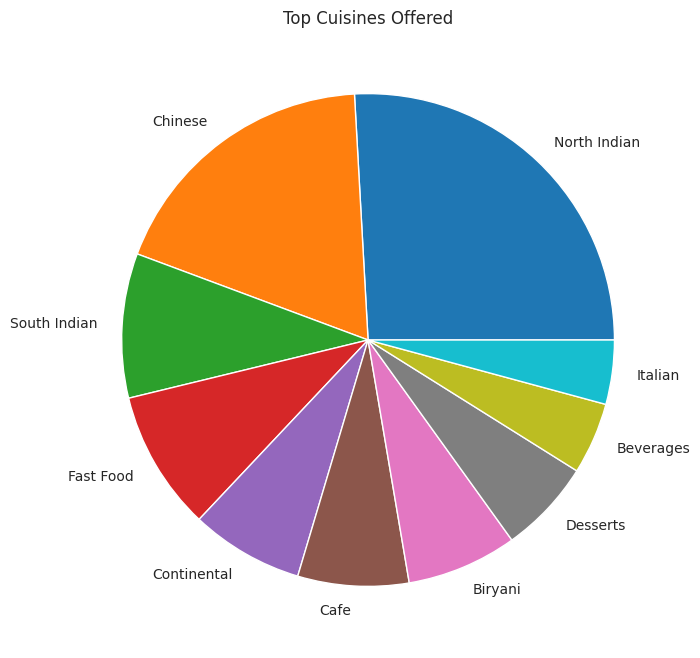

In [53]:
l =pd.Series(dict(sorted(summed_dict.items(), key=lambda d: d[1], reverse=True)[:10]))

plt.figure(figsize=(8, 8))

plt.pie(l, labels=l.index)
plt.title('Top Cuisines Offered')
plt.show()

In [56]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),rest_city
0,jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,spice elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"North Indian, Thai, Chinese",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,san churro cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Italian, Mexican, Cafe",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,"North Indian, South Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,"Rajasthani, North Indian",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,the farm house bar n grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","Continental, North Indian",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Chinese, South Indian, Andhra",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,best brews,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,chime,No,Yes,4.3,236,ITPL Main Road,Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield
